In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('global air pollution dataset.csv')
data

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [3]:
data.size

281556

In [4]:
data.shape

(23463, 12)

In [5]:
data.dtypes

Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object

In [6]:
data.ndim

2

In [7]:
data.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [8]:
data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [9]:
data.tail()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate
23462,Malaysia,Marang,70,Moderate,1,Good,38,Good,0,Good,70,Moderate


In [10]:
data.isna().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [11]:
print(data.dtypes)

Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object


In [12]:
data.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [14]:
data.duplicated().sum()

0

# HISTPLOT

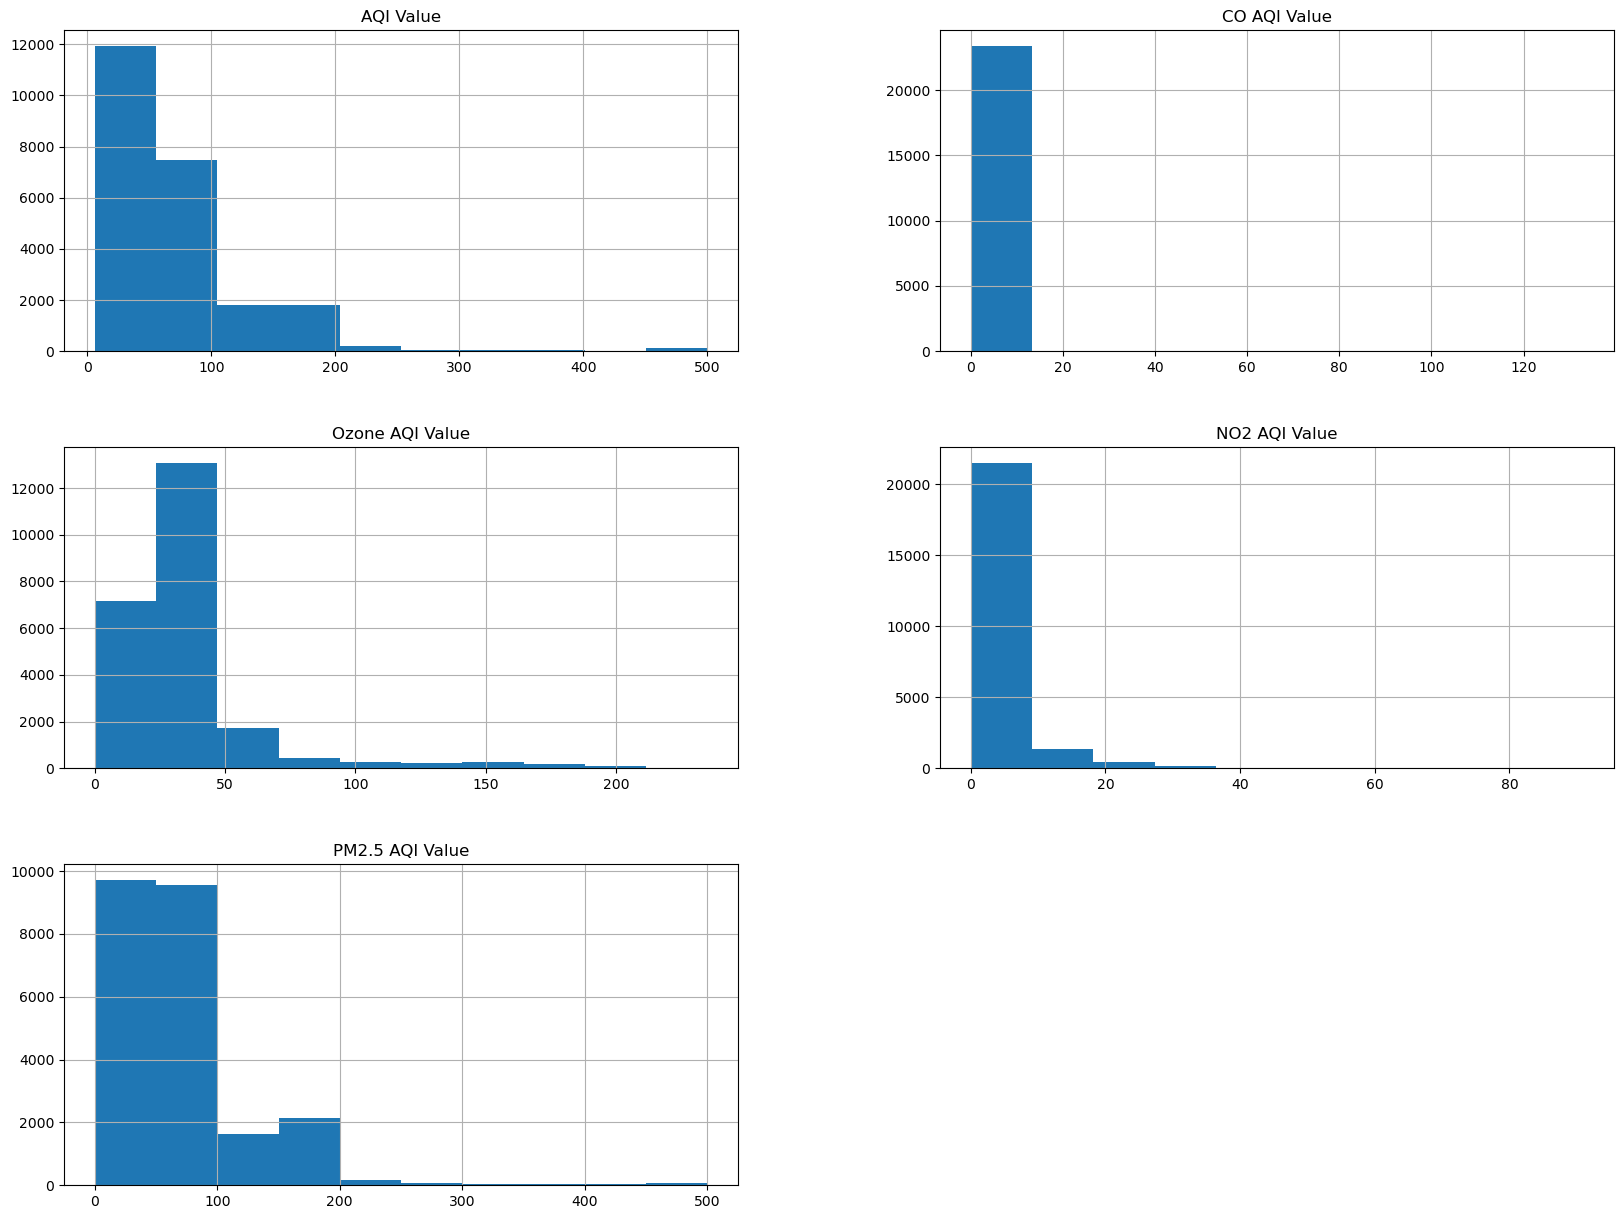

In [16]:
freq=data.select_dtypes(include="object")
data.hist(figsize=(20,15))
plt.savefig('plt.png')

In [17]:
data.drop_duplicates()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [18]:
data["Country"]=data["Country"].fillna(data["Country"].mode()[0])
data["City"]=data["City"].fillna(data["City"].mode()[0])

In [19]:
data.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

# BOXPLOT

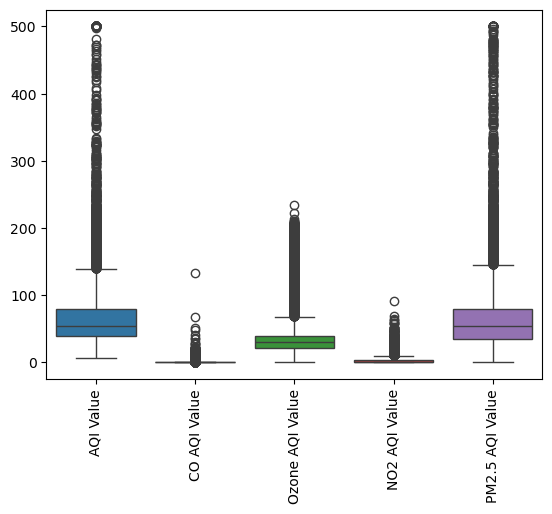

In [21]:
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

# OUTLIERS DETECTION

<Axes: >

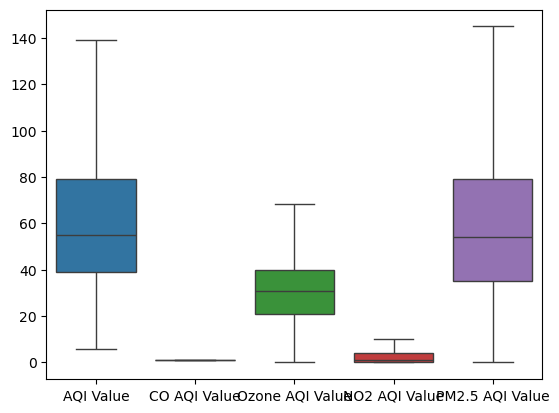

In [23]:
outlires=['AQI Value','CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']
for i in outlires:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    lb=Q1-1.5*IQR
    ub=Q3+1.5*IQR
    data.loc [(data[i]>=ub),i]=ub
    data.loc [(data[i]<=lb),i]=lb

sns.boxplot(data)

# CORRELATION,HEATMAP

In [25]:
a=data.select_dtypes(include="number").corr()
a

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
AQI Value,1.000000,NaN,0.324464,0.273272,0.980903
CO AQI Value,NaN,NaN,NaN,NaN,NaN
Ozone AQI Value,0.324464,NaN,1.000000,-0.297231,0.253222
NO2 AQI Value,0.273272,NaN,-0.297231,1.000000,0.295951
PM2.5 AQI Value,0.980903,NaN,0.253222,0.295951,1.000000


<Axes: >

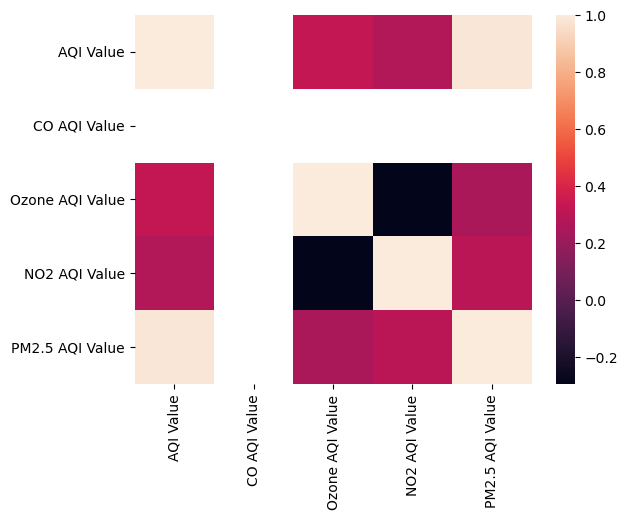

In [26]:
sns.heatmap(a)

# LABEL ENCODING

In [28]:
encoder1=LabelEncoder()
data["Country"]=encoder1.fit_transform(data["Country"])
data

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,130,Praskoveya,51,Moderate,1,Good,36.0,Good,0,Good,51,Moderate
1,22,Presidente Dutra,41,Good,1,Good,5.0,Good,1,Good,41,Good
2,75,Priolo Gargallo,66,Moderate,1,Good,39.0,Good,2,Good,66,Moderate
3,123,Przasnysz,34,Good,1,Good,34.0,Good,0,Good,20,Good
4,54,Punaauia,22,Good,1,Good,22.0,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,69,Gursahaiganj,139,Unhealthy,1,Good,68.5,Unhealthy,2,Good,145,Unhealthy
23459,54,Sceaux,50,Good,1,Good,20.0,Good,5,Good,50,Good
23460,69,Mormugao,50,Good,1,Good,22.0,Good,1,Good,50,Good
23461,166,Westerville,71,Moderate,1,Good,44.0,Good,2,Good,71,Moderate


In [29]:
encoder2=LabelEncoder()
data["City"]=encoder2.fit_transform(data["City"])
data

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,130,16525,51,Moderate,1,Good,36.0,Good,0,Good,51,Moderate
1,22,16546,41,Good,1,Good,5.0,Good,1,Good,41,Good
2,75,16582,66,Moderate,1,Good,39.0,Good,2,Good,66,Moderate
3,123,16618,34,Good,1,Good,34.0,Good,0,Good,20,Good
4,54,16699,22,Good,1,Good,22.0,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,69,7521,139,Unhealthy,1,Good,68.5,Unhealthy,2,Good,145,Unhealthy
23459,54,18631,50,Good,1,Good,20.0,Good,5,Good,50,Good
23460,69,13502,50,Good,1,Good,22.0,Good,1,Good,50,Good
23461,166,22596,71,Moderate,1,Good,44.0,Good,2,Good,71,Moderate


In [30]:
encoder3=LabelEncoder()
data["AQI Category"]=encoder3.fit_transform(data["AQI Category"])
data

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,130,16525,51,2,1,Good,36.0,Good,0,Good,51,Moderate
1,22,16546,41,0,1,Good,5.0,Good,1,Good,41,Good
2,75,16582,66,2,1,Good,39.0,Good,2,Good,66,Moderate
3,123,16618,34,0,1,Good,34.0,Good,0,Good,20,Good
4,54,16699,22,0,1,Good,22.0,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,69,7521,139,3,1,Good,68.5,Unhealthy,2,Good,145,Unhealthy
23459,54,18631,50,0,1,Good,20.0,Good,5,Good,50,Good
23460,69,13502,50,0,1,Good,22.0,Good,1,Good,50,Good
23461,166,22596,71,2,1,Good,44.0,Good,2,Good,71,Moderate


In [31]:
encoder4=LabelEncoder()
data["CO AQI Category"]=encoder4.fit_transform(data["CO AQI Category"])
data

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,130,16525,51,2,1,0,36.0,Good,0,Good,51,Moderate
1,22,16546,41,0,1,0,5.0,Good,1,Good,41,Good
2,75,16582,66,2,1,0,39.0,Good,2,Good,66,Moderate
3,123,16618,34,0,1,0,34.0,Good,0,Good,20,Good
4,54,16699,22,0,1,0,22.0,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,69,7521,139,3,1,0,68.5,Unhealthy,2,Good,145,Unhealthy
23459,54,18631,50,0,1,0,20.0,Good,5,Good,50,Good
23460,69,13502,50,0,1,0,22.0,Good,1,Good,50,Good
23461,166,22596,71,2,1,0,44.0,Good,2,Good,71,Moderate


In [32]:
encoder5=LabelEncoder()
data["Ozone AQI Category"]=encoder5.fit_transform(data["Ozone AQI Category"])
data

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,130,16525,51,2,1,0,36.0,0,0,Good,51,Moderate
1,22,16546,41,0,1,0,5.0,0,1,Good,41,Good
2,75,16582,66,2,1,0,39.0,0,2,Good,66,Moderate
3,123,16618,34,0,1,0,34.0,0,0,Good,20,Good
4,54,16699,22,0,1,0,22.0,0,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,69,7521,139,3,1,0,68.5,2,2,Good,145,Unhealthy
23459,54,18631,50,0,1,0,20.0,0,5,Good,50,Good
23460,69,13502,50,0,1,0,22.0,0,1,Good,50,Good
23461,166,22596,71,2,1,0,44.0,0,2,Good,71,Moderate


In [33]:
encoder6=LabelEncoder()
data["NO2 AQI Category"]=encoder6.fit_transform(data["NO2 AQI Category"])
data

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,130,16525,51,2,1,0,36.0,0,0,0,51,Moderate
1,22,16546,41,0,1,0,5.0,0,1,0,41,Good
2,75,16582,66,2,1,0,39.0,0,2,0,66,Moderate
3,123,16618,34,0,1,0,34.0,0,0,0,20,Good
4,54,16699,22,0,1,0,22.0,0,0,0,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,69,7521,139,3,1,0,68.5,2,2,0,145,Unhealthy
23459,54,18631,50,0,1,0,20.0,0,5,0,50,Good
23460,69,13502,50,0,1,0,22.0,0,1,0,50,Good
23461,166,22596,71,2,1,0,44.0,0,2,0,71,Moderate


In [34]:
encoder7=LabelEncoder()
data["PM2.5 AQI Category"]=encoder7.fit_transform(data["PM2.5 AQI Category"])
data

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,130,16525,51,2,1,0,36.0,0,0,0,51,2
1,22,16546,41,0,1,0,5.0,0,1,0,41,0
2,75,16582,66,2,1,0,39.0,0,2,0,66,2
3,123,16618,34,0,1,0,34.0,0,0,0,20,0
4,54,16699,22,0,1,0,22.0,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,69,7521,139,3,1,0,68.5,2,2,0,145,3
23459,54,18631,50,0,1,0,20.0,0,5,0,50,0
23460,69,13502,50,0,1,0,22.0,0,1,0,50,0
23461,166,22596,71,2,1,0,44.0,0,2,0,71,2


# SPLITING

In [36]:
x=data.drop(["PM2.5 AQI Category"],axis=1)
y=data["PM2.5 AQI Category"]
x

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value
0,130,16525,51,2,1,0,36.0,0,0,0,51
1,22,16546,41,0,1,0,5.0,0,1,0,41
2,75,16582,66,2,1,0,39.0,0,2,0,66
3,123,16618,34,0,1,0,34.0,0,0,0,20
4,54,16699,22,0,1,0,22.0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...
23458,69,7521,139,3,1,0,68.5,2,2,0,145
23459,54,18631,50,0,1,0,20.0,0,5,0,50
23460,69,13502,50,0,1,0,22.0,0,1,0,50
23461,166,22596,71,2,1,0,44.0,0,2,0,71


In [37]:
y

0        2
1        0
2        2
3        0
4        0
        ..
23458    3
23459    0
23460    0
23461    2
23462    2
Name: PM2.5 AQI Category, Length: 23463, dtype: int32

# SD SCALING

In [39]:
scaler=StandardScaler()
x_new=scaler.fit_transform(x)
x_new

array([[ 0.71268657,  0.70793877, -0.41207154, ..., -0.80059657,
        -0.02529256, -0.32498202],
       [-1.41275389,  0.71103923, -0.69087111, ..., -0.47698989,
        -0.02529256, -0.58115544],
       [-0.36971366,  0.71635431,  0.00612782, ..., -0.1533832 ,
        -0.02529256,  0.05927811],
       ...,
       [-0.48779369,  0.26161991, -0.43995149, ..., -0.47698989,
        -0.02529256, -0.35059936],
       [ 1.42116673,  1.6042675 ,  0.1455276 , ..., -0.1533832 ,
        -0.02529256,  0.18736482],
       [ 0.00420642,  0.10748267,  0.11764764, ..., -0.80059657,
        -0.02529256,  0.16174748]])

# TRAINING MODEL

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.3, random_state=42)

# FIT MODELS

In [43]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [44]:
model1.score(x_test,y_test)

0.9910498650376474

In [45]:
test_pred=model1.predict(x_test)
test_pred

array([2, 0, 0, ..., 2, 2, 4])

In [46]:
y_test

11972    2
3274     0
20011    0
3501     2
14752    0
        ..
20346    2
18206    0
21576    2
8679     2
10263    4
Name: PM2.5 AQI Category, Length: 7039, dtype: int32

In [47]:
train_pred=model1.predict(x_train)
train_pred

array([0, 2, 0, ..., 2, 0, 0])

In [48]:
y_train

22898    0
17037    2
19682    0
13586    2
19405    4
        ..
11964    2
21575    4
5390     2
860      0
15795    0
Name: PM2.5 AQI Category, Length: 16424, dtype: int32

In [49]:
score1=accuracy_score(y_test,test_pred)
score1

0.9910498650376474

In [50]:
score2=accuracy_score(y_train,train_pred)
score2

0.9912323429128105

In [51]:
cm1=confusion_matrix(test_pred,y_test)
cm1

array([[3064,    0,    0,    0,    0,    0],
       [   0,   52,    0,    0,    0,    7],
       [  10,    0, 2730,    0,    3,    0],
       [   0,    0,    0,  593,   28,    0],
       [   0,    0,    3,   12,  472,    0],
       [   0,    0,    0,    0,    0,   65]], dtype=int64)

In [52]:
cp1=classification_report(test_pred,y_test)
print(cp1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3064
           1       1.00      0.88      0.94        59
           2       1.00      1.00      1.00      2743
           3       0.98      0.95      0.97       621
           4       0.94      0.97      0.95       487
           5       0.90      1.00      0.95        65

    accuracy                           0.99      7039
   macro avg       0.97      0.97      0.97      7039
weighted avg       0.99      0.99      0.99      7039



In [53]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
train_pred=model2.predict(x_train)
train_pred

array([0, 2, 0, ..., 2, 0, 0])

In [55]:
y_train

22898    0
17037    2
19682    0
13586    2
19405    4
        ..
11964    2
21575    4
5390     2
860      0
15795    0
Name: PM2.5 AQI Category, Length: 16424, dtype: int32

In [56]:
test_pred=model2.predict(x_test)
test_pred

array([2, 0, 0, ..., 2, 2, 4])

In [57]:
y_test

11972    2
3274     0
20011    0
3501     2
14752    0
        ..
20346    2
18206    0
21576    2
8679     2
10263    4
Name: PM2.5 AQI Category, Length: 7039, dtype: int32

In [58]:
cm2=confusion_matrix(test_pred,y_test)
cm2

array([[3074,    0,    0,    0,    0,    0],
       [   0,   45,    0,    0,    0,    3],
       [   0,    0, 2733,    0,    0,    0],
       [   0,    0,    0,  602,    5,    0],
       [   0,    0,    0,    2,  498,    0],
       [   0,    7,    0,    1,    0,   69]], dtype=int64)

In [59]:
cp2=classification_report(test_pred,y_test)
print(cp2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3074
           1       0.87      0.94      0.90        48
           2       1.00      1.00      1.00      2733
           3       1.00      0.99      0.99       607
           4       0.99      1.00      0.99       500
           5       0.96      0.90      0.93        77

    accuracy                           1.00      7039
   macro avg       0.97      0.97      0.97      7039
weighted avg       1.00      1.00      1.00      7039



In [60]:
score3=accuracy_score(y_test,test_pred) 
score3

0.997442818582185

In [61]:
score4=accuracy_score(y_train,train_pred) 
score4

1.0

In [62]:
model3=RandomForestClassifier(n_estimators=47,random_state=34)
model3.fit(x_train,y_train)

RandomForestClassifier(n_estimators=47, random_state=34)

In [63]:
test_pred=model3.predict(x_test)
test_pred

array([2, 0, 0, ..., 2, 2, 4])

In [64]:
y_test

11972    2
3274     0
20011    0
3501     2
14752    0
        ..
20346    2
18206    0
21576    2
8679     2
10263    4
Name: PM2.5 AQI Category, Length: 7039, dtype: int32

In [65]:
score5=accuracy_score(test_pred,y_test)
score5    

0.997584884216508

In [66]:
train_pred=model3.predict(x_train)
train_pred

array([0, 2, 0, ..., 2, 0, 0])

In [67]:
y_train

22898    0
17037    2
19682    0
13586    2
19405    4
        ..
11964    2
21575    4
5390     2
860      0
15795    0
Name: PM2.5 AQI Category, Length: 16424, dtype: int32

In [68]:
score6=accuracy_score(train_pred,y_train)
score6    

1.0

In [69]:
cm3=confusion_matrix(test_pred,y_test)
cm3

array([[3073,    0,    0,    0,    0,    0],
       [   0,   49,    0,    0,    0,    7],
       [   1,    0, 2733,    0,    0,    0],
       [   0,    0,    0,  604,    5,    0],
       [   0,    0,    0,    1,  498,    0],
       [   0,    3,    0,    0,    0,   65]], dtype=int64)

In [70]:
cp3=classification_report(test_pred,y_test)
print(cp3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3073
           1       0.94      0.88      0.91        56
           2       1.00      1.00      1.00      2734
           3       1.00      0.99      1.00       609
           4       0.99      1.00      0.99       499
           5       0.90      0.96      0.93        68

    accuracy                           1.00      7039
   macro avg       0.97      0.97      0.97      7039
weighted avg       1.00      1.00      1.00      7039



In [71]:
model4=AdaBoostClassifier()
model4.fit(x_train,y_train)

AdaBoostClassifier()

In [72]:
test_pred=model4.predict(x_test)
test_pred

array([2, 0, 0, ..., 2, 2, 3])

In [73]:
y_test

11972    2
3274     0
20011    0
3501     2
14752    0
        ..
20346    2
18206    0
21576    2
8679     2
10263    4
Name: PM2.5 AQI Category, Length: 7039, dtype: int32

In [74]:
score7=accuracy_score(test_pred,y_test)
score7    

0.9119193067197046

In [75]:
train_pred=model4.predict(x_train)
train_pred

array([0, 2, 0, ..., 2, 0, 0])

In [76]:
y_train

22898    0
17037    2
19682    0
13586    2
19405    4
        ..
11964    2
21575    4
5390     2
860      0
15795    0
Name: PM2.5 AQI Category, Length: 16424, dtype: int32

In [77]:
score8=accuracy_score(train_pred,y_train)
score8    

0.9140282513395032

In [78]:
cm4=confusion_matrix(test_pred,y_test)
cm4

array([[3074,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0],
       [   0,    0, 2733,    0,    0,    0],
       [   0,    0,    0,  605,  503,   65],
       [   0,    0,    0,    0,    0,    0],
       [   0,   52,    0,    0,    0,    7]], dtype=int64)

In [79]:
cp4=classification_report(test_pred,y_test)
print(cp4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3074
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00      2733
           3       1.00      0.52      0.68      1173
           4       0.00      0.00      0.00         0
           5       0.10      0.12      0.11        59

    accuracy                           0.91      7039
   macro avg       0.52      0.44      0.46      7039
weighted avg       0.99      0.91      0.94      7039



In [80]:
model5=GradientBoostingClassifier()
model5.fit(x_train,y_train)

GradientBoostingClassifier()

In [81]:
test_pred=model5.predict(x_test)
test_pred

array([2, 0, 0, ..., 2, 2, 4])

In [82]:
y_test

11972    2
3274     0
20011    0
3501     2
14752    0
        ..
20346    2
18206    0
21576    2
8679     2
10263    4
Name: PM2.5 AQI Category, Length: 7039, dtype: int32

In [83]:
score9=accuracy_score(test_pred,y_test)
score9   

0.9917601932092627

In [84]:
train_pred=model5.predict(x_train)
train_pred

array([0, 2, 0, ..., 2, 0, 0])

In [85]:
y_train

22898    0
17037    2
19682    0
13586    2
19405    4
        ..
11964    2
21575    4
5390     2
860      0
15795    0
Name: PM2.5 AQI Category, Length: 16424, dtype: int32

In [86]:
score10=accuracy_score(train_pred,y_train)
score10  

0.9926936190940088

In [87]:
cm5=confusion_matrix(test_pred,y_test)
cm5

array([[3074,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0],
       [   0,    0, 2733,    0,    0,    0],
       [   0,    0,    0,  604,    5,    0],
       [   0,    0,    0,    1,  498,    0],
       [   0,   52,    0,    0,    0,   72]], dtype=int64)

In [88]:
cp5=classification_report(test_pred,y_test)
print(cp5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3074
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00      2733
           3       1.00      0.99      1.00       609
           4       0.99      1.00      0.99       499
           5       1.00      0.58      0.73       124

    accuracy                           0.99      7039
   macro avg       0.83      0.76      0.79      7039
weighted avg       1.00      0.99      0.99      7039



In [89]:
model6=XGBClassifier()
model6.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [90]:
model6.score(x_test,y_test)

0.9982952123881234

In [91]:
score11=accuracy_score(test_pred,y_test)
score11

0.9917601932092627

In [92]:
train_pred=model6.predict(x_train)
train_pred

array([0, 2, 0, ..., 2, 0, 0], dtype=int64)

In [93]:
y_train

22898    0
17037    2
19682    0
13586    2
19405    4
        ..
11964    2
21575    4
5390     2
860      0
15795    0
Name: PM2.5 AQI Category, Length: 16424, dtype: int32

In [94]:
score12=accuracy_score(train_pred,y_train)
score12  

0.9999391134924501

In [95]:
cm6=confusion_matrix(test_pred,y_test)
cm6

array([[3074,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0],
       [   0,    0, 2733,    0,    0,    0],
       [   0,    0,    0,  604,    5,    0],
       [   0,    0,    0,    1,  498,    0],
       [   0,   52,    0,    0,    0,   72]], dtype=int64)

In [96]:
cp6=classification_report(test_pred,y_test)
print(cp6)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3074
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00      2733
           3       1.00      0.99      1.00       609
           4       0.99      1.00      0.99       499
           5       1.00      0.58      0.73       124

    accuracy                           0.99      7039
   macro avg       0.83      0.76      0.79      7039
weighted avg       1.00      0.99      0.99      7039



In [97]:
model7=KNeighborsClassifier(n_neighbors=10)
model7.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [98]:
test_pred=model7.predict(x_test)
test_pred

array([2, 0, 0, ..., 2, 2, 4])

In [99]:
y_test

11972    2
3274     0
20011    0
3501     2
14752    0
        ..
20346    2
18206    0
21576    2
8679     2
10263    4
Name: PM2.5 AQI Category, Length: 7039, dtype: int32

In [100]:
train_pred=model7.predict(x_train)
train_pred

array([0, 2, 0, ..., 2, 0, 0])

In [101]:
y_train

22898    0
17037    2
19682    0
13586    2
19405    4
        ..
11964    2
21575    4
5390     2
860      0
15795    0
Name: PM2.5 AQI Category, Length: 16424, dtype: int32

In [102]:
score13=accuracy_score(train_pred,y_train)
score13    

0.9886142230881637

In [103]:
score14=accuracy_score(test_pred,y_test)
score14    

0.9872140929109249

In [104]:
cm7=confusion_matrix(test_pred,y_test)
cm7

array([[3068,    0,    7,    0,    0,    0],
       [   0,   47,    0,    0,    0,    7],
       [   6,    0, 2724,    0,    3,    0],
       [   0,    4,    0,  598,   38,    1],
       [   0,    0,    2,    4,  462,   14],
       [   0,    1,    0,    3,    0,   50]], dtype=int64)

In [105]:
cp7=classification_report(test_pred,y_test)
print(cp7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3075
           1       0.90      0.87      0.89        54
           2       1.00      1.00      1.00      2733
           3       0.99      0.93      0.96       641
           4       0.92      0.96      0.94       482
           5       0.69      0.93      0.79        54

    accuracy                           0.99      7039
   macro avg       0.92      0.95      0.93      7039
weighted avg       0.99      0.99      0.99      7039



In [106]:
model8=GaussianNB()
model8.fit(x_train,y_train)

GaussianNB()

In [107]:
test_pred=model8.predict(x_test)
test_pred

array([2, 0, 0, ..., 2, 2, 4])

In [108]:
y_test

11972    2
3274     0
20011    0
3501     2
14752    0
        ..
20346    2
18206    0
21576    2
8679     2
10263    4
Name: PM2.5 AQI Category, Length: 7039, dtype: int32

In [109]:
train_pred=model8.predict(x_train)
train_pred

array([0, 2, 0, ..., 2, 0, 0])

In [110]:
y_train

22898    0
17037    2
19682    0
13586    2
19405    4
        ..
11964    2
21575    4
5390     2
860      0
15795    0
Name: PM2.5 AQI Category, Length: 16424, dtype: int32

In [111]:
score15=accuracy_score(y_train,train_pred)
score15

0.8857160253287871

In [112]:
score16=accuracy_score(y_test,test_pred)
score16

0.8907515272055689

In [113]:
cm8=confusion_matrix(test_pred,y_test)
cm8

array([[2994,    0,    0,    0,    0,    0],
       [   0,   51,    0,    0,    0,    7],
       [  79,    0, 2694,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0],
       [   1,    0,   39,    0,  466,    0],
       [   0,    1,    0,  605,   37,   65]], dtype=int64)

In [114]:
cp8=classification_report(test_pred,y_test)
print(cp8)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2994
           1       0.98      0.88      0.93        58
           2       0.99      0.97      0.98      2773
           3       0.00      0.00      0.00         0
           4       0.93      0.92      0.92       506
           5       0.90      0.09      0.17       708

    accuracy                           0.89      7039
   macro avg       0.79      0.64      0.66      7039
weighted avg       0.97      0.89      0.90      7039



In [115]:
model_names=["Logistic Regression","Decision tree","Random forest","Adaboost","Gradient boosting","XGB","KNN","GaussianNB"]
train_scores=[score2,score4,score6,score8,score10,score12,score14,score16]
test_scores=[score1,score3,score5,score7,score9,score11,score13,score15]
pd.DataFrame({"model":model_names,"test_accuracy":test_scores,"train_accuracy":train_scores})

,model,test_accuracy,train_accuracy
0,Logistic Regression,0.991050,0.991232
1,Decision tree,0.997443,1.000000
2,Random forest,0.997585,1.000000
3,Adaboost,0.911919,0.914028
4,Gradient boosting,0.991760,0.992694
5,XGB,0.991760,0.999939
6,KNN,0.988614,0.987214
7,GaussianNB,0.885716,0.890752


# BALANCING

In [117]:
data["PM2.5 AQI Category"].value_counts()

PM2.5 AQI Category
0    10208
2     9075
3     2129
4     1624
5      255
1      172
Name: count, dtype: int64

In [118]:
from imblearn.over_sampling import SMOTE
over=SMOTE(random_state=2)
x_os,y_os=over.fit_resample(x_new,y)
y_os.value_counts()

PM2.5 AQI Category
2    10208
0    10208
4    10208
3    10208
5    10208
1    10208
Name: count, dtype: int64

# TRAINING THE MODEL

In [120]:
x_trainos,x_testos,y_trainos,y_testos=train_test_split(x_os,y_os,test_size=.3, random_state=42)

# Train and evaluate the models

In [122]:
model9=LogisticRegression()
model9.fit(x_trainos, y_trainos)

LogisticRegression()

In [123]:
train_pred=model9.predict(x_trainos)
train_pred

array([1, 4, 2, ..., 0, 0, 5])

In [124]:
y_trainos

29012    1
43348    4
11592    2
43774    4
7886     5
        ..
54343    5
38158    3
860      0
15795    0
56422    5
Name: PM2.5 AQI Category, Length: 42873, dtype: int32

In [125]:
test_pred=model9.predict(x_testos)
test_pred

array([0, 2, 2, ..., 3, 4, 5])

In [126]:
y_testos

17962    0
19270    2
22281    2
49125    4
33318    1
        ..
42013    3
28825    1
35193    3
45092    4
54477    5
Name: PM2.5 AQI Category, Length: 18375, dtype: int32

In [127]:
score17=accuracy_score(y_trainos,train_pred) 
score17

0.965596062790101

In [128]:
score18=accuracy_score(y_testos,test_pred) 
score18

0.9674013605442177

In [129]:
cm9=confusion_matrix(test_pred,y_testos)
cm9

array([[3047,    0,    3,    0,    0,    0],
       [   0, 3084,    0,    0,    0,  205],
       [  15,    0, 2989,    0,    2,    0],
       [   0,    0,    0, 3053,  116,    0],
       [   0,    0,   32,    0, 2728,    0],
       [   0,    0,    0,   50,  176, 2875]], dtype=int64)

In [130]:
cp9=classification_report(test_pred,y_testos)
print(cp9)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3050
           1       1.00      0.94      0.97      3289
           2       0.99      0.99      0.99      3006
           3       0.98      0.96      0.97      3169
           4       0.90      0.99      0.94      2760
           5       0.93      0.93      0.93      3101

    accuracy                           0.97     18375
   macro avg       0.97      0.97      0.97     18375
weighted avg       0.97      0.97      0.97     18375



In [131]:
model10=DecisionTreeClassifier()
model10.fit(x_trainos,y_trainos)

DecisionTreeClassifier()

In [132]:
train_pred=model10.predict(x_trainos)
train_pred

array([1, 4, 2, ..., 0, 0, 5])

In [133]:
y_trainos

29012    1
43348    4
11592    2
43774    4
7886     5
        ..
54343    5
38158    3
860      0
15795    0
56422    5
Name: PM2.5 AQI Category, Length: 42873, dtype: int32

In [134]:
test_pred=model10.predict(x_testos)
test_pred

array([0, 2, 2, ..., 3, 4, 5])

In [135]:
y_testos

17962    0
19270    2
22281    2
49125    4
33318    1
        ..
42013    3
28825    1
35193    3
45092    4
54477    5
Name: PM2.5 AQI Category, Length: 18375, dtype: int32

In [136]:
score19=accuracy_score(y_trainos,train_pred) 
score19

1.0

In [137]:
score20=accuracy_score(y_testos,test_pred) 
score20

0.9957551020408163

In [138]:
cm10=confusion_matrix(test_pred,y_testos)
cm10

array([[3062,    0,    0,    0,    0,    0],
       [   0, 3055,    0,    0,    0,   37],
       [   0,    0, 3024,    0,    0,    0],
       [   0,    0,    0, 3100,    9,    0],
       [   0,    0,    0,    3, 3013,    0],
       [   0,   29,    0,    0,    0, 3043]], dtype=int64)

In [139]:
cp10=classification_report(test_pred,y_testos)
print(cp10)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3062
           1       0.99      0.99      0.99      3092
           2       1.00      1.00      1.00      3024
           3       1.00      1.00      1.00      3109
           4       1.00      1.00      1.00      3016
           5       0.99      0.99      0.99      3072

    accuracy                           1.00     18375
   macro avg       1.00      1.00      1.00     18375
weighted avg       1.00      1.00      1.00     18375



In [140]:
model11=RandomForestClassifier(n_estimators=47,random_state=34)
model11.fit(x_trainos,y_trainos)

RandomForestClassifier(n_estimators=47, random_state=34)

In [141]:
train_pred=model11.predict(x_trainos)
train_pred

array([1, 4, 2, ..., 0, 0, 5])

In [142]:
y_trainos

29012    1
43348    4
11592    2
43774    4
7886     5
        ..
54343    5
38158    3
860      0
15795    0
56422    5
Name: PM2.5 AQI Category, Length: 42873, dtype: int32

In [143]:
test_pred=model11.predict(x_testos)
test_pred

array([0, 2, 2, ..., 3, 4, 5])

In [144]:
y_testos

17962    0
19270    2
22281    2
49125    4
33318    1
        ..
42013    3
28825    1
35193    3
45092    4
54477    5
Name: PM2.5 AQI Category, Length: 18375, dtype: int32

In [145]:
score21=accuracy_score(y_trainos,train_pred) 
score21

1.0

In [146]:
score22=accuracy_score(y_testos,test_pred) 
score22

0.996843537414966

In [147]:
cm11=confusion_matrix(test_pred,y_testos)
cm11

array([[3062,    0,    0,    0,    0,    0],
       [   0, 3076,    0,    0,    0,   40],
       [   0,    0, 3024,    0,    0,    0],
       [   0,    0,    0, 3102,    9,    0],
       [   0,    0,    0,    1, 3013,    0],
       [   0,    8,    0,    0,    0, 3040]], dtype=int64)

In [148]:
cp11=classification_report(test_pred,y_testos)
print(cp11)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3062
           1       1.00      0.99      0.99      3116
           2       1.00      1.00      1.00      3024
           3       1.00      1.00      1.00      3111
           4       1.00      1.00      1.00      3014
           5       0.99      1.00      0.99      3048

    accuracy                           1.00     18375
   macro avg       1.00      1.00      1.00     18375
weighted avg       1.00      1.00      1.00     18375



In [149]:
model12=AdaBoostClassifier()
model12.fit(x_trainos,y_trainos)

AdaBoostClassifier()

In [150]:
train_pred=model12.predict(x_trainos)
train_pred

array([5, 4, 2, ..., 0, 0, 3])

In [151]:
y_trainos

29012    1
43348    4
11592    2
43774    4
7886     5
        ..
54343    5
38158    3
860      0
15795    0
56422    5
Name: PM2.5 AQI Category, Length: 42873, dtype: int32

In [152]:
test_pred=model12.predict(x_testos)
test_pred

array([0, 2, 2, ..., 3, 4, 3])

In [153]:
y_testos

17962    0
19270    2
22281    2
49125    4
33318    1
        ..
42013    3
28825    1
35193    3
45092    4
54477    5
Name: PM2.5 AQI Category, Length: 18375, dtype: int32

In [154]:
score23=accuracy_score(y_trainos,train_pred) 
score23

0.6757399762088028

In [155]:
score24=accuracy_score(y_testos,test_pred) 
score24

0.6714557823129251

In [156]:
cm12=confusion_matrix(test_pred,y_testos)
cm12

array([[3062,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0],
       [   0,    0, 3024,    0,    0,    0],
       [   0,    0,    0, 3103,   78, 2875],
       [   0,    0,    0,    0, 2944,    0],
       [   0, 3084,    0,    0,    0,  205]], dtype=int64)

In [157]:
cp12=classification_report(test_pred,y_testos)
print(cp12)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3062
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00      3024
           3       1.00      0.51      0.68      6056
           4       0.97      1.00      0.99      2944
           5       0.07      0.06      0.06      3289

    accuracy                           0.67     18375
   macro avg       0.67      0.60      0.62     18375
weighted avg       0.83      0.67      0.72     18375



In [158]:
model13=GradientBoostingClassifier()
model13.fit(x_trainos,y_trainos)

GradientBoostingClassifier()

In [159]:
train_pred=model13.predict(x_trainos)
train_pred

array([1, 4, 2, ..., 0, 0, 5])

In [160]:
y_trainos

29012    1
43348    4
11592    2
43774    4
7886     5
        ..
54343    5
38158    3
860      0
15795    0
56422    5
Name: PM2.5 AQI Category, Length: 42873, dtype: int32

In [161]:
test_pred=model13.predict(x_testos)
test_pred

array([0, 2, 2, ..., 3, 4, 5])

In [162]:
y_testos

17962    0
19270    2
22281    2
49125    4
33318    1
        ..
42013    3
28825    1
35193    3
45092    4
54477    5
Name: PM2.5 AQI Category, Length: 18375, dtype: int32

In [163]:
score25=accuracy_score(y_trainos,train_pred) 
score25

0.9940988500921326

In [164]:
score26=accuracy_score(y_testos,test_pred) 
score26

0.9935238095238095

In [165]:
cm13=confusion_matrix(test_pred,y_testos)
cm13

array([[3062,    0,    0,    0,    0,    0],
       [   0, 3081,    0,    0,    0,  103],
       [   0,    0, 3024,    0,    0,    0],
       [   0,    0,    0, 3102,   12,    0],
       [   0,    0,    0,    1, 3010,    0],
       [   0,    3,    0,    0,    0, 2977]], dtype=int64)

In [166]:
cp13=classification_report(test_pred,y_testos)
print(cp13)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3062
           1       1.00      0.97      0.98      3184
           2       1.00      1.00      1.00      3024
           3       1.00      1.00      1.00      3114
           4       1.00      1.00      1.00      3011
           5       0.97      1.00      0.98      2980

    accuracy                           0.99     18375
   macro avg       0.99      0.99      0.99     18375
weighted avg       0.99      0.99      0.99     18375



In [167]:
model14=XGBClassifier()
model14.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [168]:
train_pred=model14.predict(x_trainos)
train_pred

array([1, 4, 2, ..., 0, 0, 5], dtype=int64)

In [169]:
y_trainos

29012    1
43348    4
11592    2
43774    4
7886     5
        ..
54343    5
38158    3
860      0
15795    0
56422    5
Name: PM2.5 AQI Category, Length: 42873, dtype: int32

In [170]:
test_pred=model14.predict(x_testos)
test_pred

array([0, 2, 2, ..., 3, 4, 5], dtype=int64)

In [171]:
y_testos

17962    0
19270    2
22281    2
49125    4
33318    1
        ..
42013    3
28825    1
35193    3
45092    4
54477    5
Name: PM2.5 AQI Category, Length: 18375, dtype: int32

In [172]:
score27=accuracy_score(y_trainos,train_pred) 
score27

0.9868915168054486

In [173]:
score28=accuracy_score(y_testos,test_pred) 
score28

0.9880816326530613

In [174]:
cm14=confusion_matrix(test_pred,y_testos)
cm14

array([[3062,    0,    0,    0,    0,    0],
       [   0, 3013,    0,    0,    0,  134],
       [   0,    0, 3024,    0,    0,    0],
       [   0,    0,    0, 3102,    9,    4],
       [   0,    0,    0,    1, 3013,    0],
       [   0,   71,    0,    0,    0, 2942]], dtype=int64)

In [175]:
cp14=classification_report(test_pred,y_testos)
print(cp14)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3062
           1       0.98      0.96      0.97      3147
           2       1.00      1.00      1.00      3024
           3       1.00      1.00      1.00      3115
           4       1.00      1.00      1.00      3014
           5       0.96      0.98      0.97      3013

    accuracy                           0.99     18375
   macro avg       0.99      0.99      0.99     18375
weighted avg       0.99      0.99      0.99     18375



In [176]:
model15=KNeighborsClassifier(n_neighbors=10)
model15.fit(x_trainos,y_trainos)

KNeighborsClassifier(n_neighbors=10)

In [177]:
test_pred=model15.predict(x_testos)
test_pred

array([0, 2, 2, ..., 3, 4, 5])

In [178]:
y_testos

17962    0
19270    2
22281    2
49125    4
33318    1
        ..
42013    3
28825    1
35193    3
45092    4
54477    5
Name: PM2.5 AQI Category, Length: 18375, dtype: int32

In [179]:
train_pred=model15.predict(x_trainos)
train_pred

array([1, 4, 2, ..., 0, 0, 5])

In [180]:
y_trainos

29012    1
43348    4
11592    2
43774    4
7886     5
        ..
54343    5
38158    3
860      0
15795    0
56422    5
Name: PM2.5 AQI Category, Length: 42873, dtype: int32

In [181]:
score29=accuracy_score(y_trainos,train_pred) 
score29

0.9910899633802159

In [182]:
score30=accuracy_score(y_testos,test_pred) 
score30

0.9897142857142858

In [183]:
cm15=confusion_matrix(test_pred,y_testos)
cm15

array([[3052,    0,    5,    0,    0,    0],
       [   0, 3084,    0,    3,    0,   89],
       [  10,    0, 2997,    0,    0,    0],
       [   0,    0,    0, 3091,   47,    1],
       [   0,    0,   22,    7, 2972,    0],
       [   0,    0,    0,    2,    3, 2990]], dtype=int64)

In [184]:
cp15=classification_report(test_pred,y_testos)
print(cp15)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3057
           1       1.00      0.97      0.99      3176
           2       0.99      1.00      0.99      3007
           3       1.00      0.98      0.99      3139
           4       0.98      0.99      0.99      3001
           5       0.97      1.00      0.98      2995

    accuracy                           0.99     18375
   macro avg       0.99      0.99      0.99     18375
weighted avg       0.99      0.99      0.99     18375



In [185]:
model16=GaussianNB()
model16.fit(x_trainos,y_trainos)

GaussianNB()

In [186]:
test_pred=model16.predict(x_testos)
test_pred

array([0, 2, 2, ..., 5, 4, 5])

In [187]:
y_testos

17962    0
19270    2
22281    2
49125    4
33318    1
        ..
42013    3
28825    1
35193    3
45092    4
54477    5
Name: PM2.5 AQI Category, Length: 18375, dtype: int32

In [188]:
train_pred=model16.predict(x_trainos)
train_pred

array([1, 4, 2, ..., 0, 0, 5])

In [189]:
y_trainos

29012    1
43348    4
11592    2
43774    4
7886     5
        ..
54343    5
38158    3
860      0
15795    0
56422    5
Name: PM2.5 AQI Category, Length: 42873, dtype: int32

In [190]:
score31=accuracy_score(y_trainos,train_pred) 
score31

0.8061950411681011

In [191]:
score32=accuracy_score(y_testos,test_pred) 
score32

0.8019591836734694

In [192]:
cm16=confusion_matrix(test_pred,y_testos)
cm16

array([[2981,    0,    0,    0,    0,    0],
       [   0, 2958,    0,    0,    0,  203],
       [  81,    0, 2976,    0,    0,    0],
       [   0,    0,    0,    2,    0,    0],
       [   0,    0,   48,    0, 2942,    0],
       [   0,  126,    0, 3101,   80, 2877]], dtype=int64)

In [193]:
cp16=classification_report(test_pred,y_testos)
print(cp16)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2981
           1       0.96      0.94      0.95      3161
           2       0.98      0.97      0.98      3057
           3       0.00      1.00      0.00         2
           4       0.97      0.98      0.98      2990
           5       0.93      0.47      0.62      6184

    accuracy                           0.80     18375
   macro avg       0.80      0.89      0.75     18375
weighted avg       0.96      0.80      0.85     18375



In [194]:
train_scores_balance=[score17,score19,score21,score23,score25,score27,score29,score31]
test_scores_balance=[score18,score20,score22,score24,score26,score28,score30,score32]

In [195]:
pd.DataFrame({"model":model_names,"accuracy_before_balancing":test_scores,"accuracy_after_balancing":test_scores_balance})

,model,accuracy_before_balancing,accuracy_after_balancing
0,Logistic Regression,0.991050,0.967401
1,Decision tree,0.997443,0.995755
2,Random forest,0.997585,0.996844
3,Adaboost,0.911919,0.671456
4,Gradient boosting,0.991760,0.993524
5,XGB,0.991760,0.988082
6,KNN,0.988614,0.989714
7,GaussianNB,0.885716,0.801959


# HYPER PARAMETER TUNING

In [197]:
hpt1=GridSearchCV(model9,{"C": [1, 5, 10],"penalty": ["l1", "l2"],"solver": ["liblinear", "saga"]},cv=5,return_train_score=True)
hpt1.fit(x_trainos,y_trainos)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             return_train_score=True)

In [198]:
hpt1_data1=hpt1.cv_results_
hpt1.best_params_

{'C': 5, 'penalty': 'l1', 'solver': 'saga'}

In [199]:
hpt1.best_score_

0.9491755140124629

In [200]:
lr_model=LogisticRegression(C=1, penalty ="l2", solver="saga")
lr_model.fit(x_trainos,y_trainos)

LogisticRegression(C=1, solver='saga')

In [201]:
train_pred=lr_model.predict(x_trainos)
train_pred

array([1, 4, 2, ..., 0, 0, 5])

In [202]:
test_pred=lr_model.predict(x_testos)
test_pred

array([0, 2, 2, ..., 3, 4, 5])

In [203]:
p_sc1=accuracy_score(train_pred,y_trainos)
p_sc1

0.9512047209199262

In [204]:
p_sc2=accuracy_score(test_pred,y_testos)
p_sc2

0.953469387755102

In [205]:
hpt2=GridSearchCV(model10,{"criterion":["gini","entropy"],"splitter":["best","random"],"random_state":[0,42]},cv=5,return_train_score=True)
hpt2.fit(x_trainos,y_trainos)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [206]:
hpt2_data2=hpt2.cv_results_
hpt2.best_params_

{'criterion': 'entropy', 'random_state': 0, 'splitter': 'best'}

In [207]:
hpt2.best_score_

0.9953117275701644

In [208]:
ds_model=DecisionTreeClassifier(criterion='entropy', random_state=42,splitter='best')
ds_model.fit(x_trainos,y_trainos)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [209]:
train_pred=ds_model.predict(x_trainos)
train_pred

array([1, 4, 2, ..., 0, 0, 5])

In [210]:
test_pred=ds_model.predict(x_testos)
test_pred

array([0, 2, 2, ..., 3, 4, 5])

In [211]:
p_sc3=accuracy_score(train_pred,y_trainos)
p_sc3

1.0

In [212]:
p_sc4=accuracy_score(test_pred,y_testos)
p_sc4

0.995156462585034

In [213]:
hpt3=GridSearchCV(model11,{"n_estimators":[10,50,100],"criterion":["gini","entorpy"],"max_depth":[None,5,10]},cv=5,return_train_score=True)
hpt3.fit(x_trainos,y_trainos)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=47, random_state=34),
             param_grid={'criterion': ['gini', 'entorpy'],
                         'max_depth': [None, 5, 10],
                         'n_estimators': [10, 50, 100]},
             return_train_score=True)

In [214]:
hpt3_data3=hpt3.cv_results_
hpt3.best_params_

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}

In [215]:
hpt2.best_score_

0.9953117275701644

In [216]:
rf_model=RandomForestClassifier(criterion='gini',max_depth=None,n_estimators=100)
rf_model.fit(x_trainos,y_trainos)

RandomForestClassifier()

In [217]:
train_pred=rf_model.predict(x_trainos)
train_pred

array([1, 4, 2, ..., 0, 0, 5])

In [218]:
test_pred=rf_model.predict(x_testos)
test_pred

array([0, 2, 2, ..., 3, 4, 5])

In [219]:
p_sc5=accuracy_score(train_pred,y_trainos)
p_sc5

1.0

In [220]:
p_sc6=accuracy_score(test_pred,y_testos)
p_sc6

0.9969523809523809

In [221]:
hpt4=GridSearchCV(model12,{"n_estimators":[50,100],"learning_rate":[0.01,0.1,1],"random_state":[0,42]},cv=5,return_train_score=True)
hpt4.fit(x_trainos,y_trainos)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100], 'random_state': [0, 42]},
             return_train_score=True)

In [222]:
hpt4_data4=hpt4.cv_results_
hpt4.best_params_

{'learning_rate': 0.01, 'n_estimators': 50, 'random_state': 0}

In [223]:
hpt4.best_score_

0.9121387665333053

In [224]:
ad_model=AdaBoostClassifier(learning_rate=1,n_estimators=100,random_state=0)
ad_model.fit(x_trainos,y_trainos)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=0)

In [225]:
train_pred=ad_model.predict(x_trainos)
train_pred

array([5, 4, 2, ..., 0, 0, 3])

In [226]:
test_pred=ad_model.predict(x_testos)
test_pred

array([0, 2, 2, ..., 3, 4, 3])

In [227]:
p_sc7=accuracy_score(train_pred,y_trainos)
p_sc7

0.6757399762088028

In [228]:
p_sc8=accuracy_score(test_pred,y_testos)
p_sc8

0.6714557823129251

In [229]:
hpt5=GridSearchCV(model13,{"n_estimators":[50,100],"learning_rate":[0.01,0.1,0.2],"max_depth":[3,5,7]},cv=5,return_train_score=True)
hpt5.fit(x_trainos,y_trainos)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100]},
             return_train_score=True)

In [230]:
hpt5_data5=hpt5.cv_results_
hpt5.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

In [231]:
hpt5.best_score_

0.995591621833178

In [232]:
gd_model=GradientBoostingClassifier(learning_rate=0.1,max_depth=7,n_estimators=100)
gd_model.fit(x_trainos,y_trainos)

GradientBoostingClassifier(max_depth=7)

In [233]:
train_pred=gd_model.predict(x_trainos)
train_pred

array([1, 4, 2, ..., 0, 0, 5])

In [234]:
test_pred=gd_model.predict(x_testos)
test_pred

array([0, 2, 2, ..., 3, 4, 5])

In [235]:
p_sc9=accuracy_score(train_pred,y_trainos)
p_sc9

0.9996501294521027

In [236]:
p_sc10=accuracy_score(test_pred,y_testos)
p_sc10

0.9956462585034014

In [237]:
hpt6=GridSearchCV(model14,{"n_estimators":[50,100],"gamma":[0,1,5],"booster":["gbtree","gblinear","dart"]},cv=5,return_train_score=True)
hpt6.fit(x_trainos,y_trainos)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'gamma': [0, 1, 5], 'n_estimators': [50, 100]},
             return_train_score=True)

In [238]:
hpt6_data6=hpt6.cv_results_
hpt6.best_params_

{'booster': 'gbtree', 'gamma': 0, 'n_estimators': 100}

In [239]:
hpt6.best_score_

0.9963613582591888

In [240]:
xgb_model=XGBClassifier(booster='gbtree',gamma=0,n_estimators=100)
xgb_model.fit(x_trainos,y_trainos)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [241]:
train_pred=xgb_model.predict(x_trainos)
train_pred

array([1, 4, 2, ..., 0, 0, 5], dtype=int64)

In [242]:
test_pred=xgb_model.predict(x_testos)
test_pred

array([0, 2, 2, ..., 3, 4, 5], dtype=int64)

In [243]:
p_sc11=accuracy_score(train_pred,y_trainos)
p_sc11

0.9990436871690808

In [244]:
p_sc12=accuracy_score(test_pred,y_testos)
p_sc12

0.9966802721088436

In [245]:
hpt7=GridSearchCV(model15,{"n_neighbors":[3,5,7],"weights":["uniform","distance"]},cv=5, return_train_score =True)
hpt7.fit(x_trainos,y_trainos)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [246]:
hpt7_data7=hpt7.cv_results_
hpt7.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [247]:
hpt7.best_score_

0.9942154659724531

In [248]:
knn_model=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn_model.fit(x_trainos,y_trainos)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [249]:
train_pred=knn_model.predict(x_trainos)
train_pred

array([1, 4, 2, ..., 0, 0, 5])

In [250]:
test_pred=knn_model.predict(x_testos)
test_pred

array([0, 2, 2, ..., 3, 4, 5])

In [251]:
p_sc13=accuracy_score(train_pred,y_trainos)
p_sc13

1.0

In [252]:
p_sc14=accuracy_score(test_pred,y_testos)
p_sc14

0.9948843537414966

In [253]:
hpt8=GridSearchCV(model16,{"priors":[None,[0.5,0.5],[0.7,0.3]]},cv=5,return_train_score=True)
hpt8.fit(x_trainos,y_trainos)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.5, 0.5], [0.7, 0.3]]},
             return_train_score=True)

In [254]:
hpt8_data8=hpt8.cv_results_
hpt8.best_params_

{'priors': None}

In [255]:
hpt8.best_score_

0.8062417193209385

In [256]:
gnb_model=GaussianNB(priors=None)
gnb_model.fit(x_trainos,y_trainos)

GaussianNB()

In [257]:
train_pred=gnb_model.predict(x_trainos)
train_pred

array([1, 4, 2, ..., 0, 0, 5])

In [258]:
test_pred=gnb_model.predict(x_testos)
test_pred

array([0, 2, 2, ..., 5, 4, 5])

In [259]:
p_sc15=accuracy_score(train_pred,y_trainos)
p_sc15

0.8061950411681011

In [260]:
p_sc16=accuracy_score(test_pred,y_testos)
p_sc16

0.8019591836734694

In [261]:
tuning_scores=[hpt1,hpt2,hpt3,hpt4,hpt5,hpt6,hpt7,hpt8]
train_tuning_scores=[p_sc1,p_sc3,p_sc5,p_sc7,p_sc9,p_sc11,p_sc13,p_sc15]
test_tuning_scores=[p_sc2,p_sc4,p_sc6,p_sc8,p_sc10,p_sc12,p_sc14,p_sc16]

In [262]:
pd.DataFrame({"model":model_names,"accuracy":test_scores_balance,"accuracy_after_hyperparametertuning":test_tuning_scores})

,model,accuracy,accuracy_after_hyperparametertuning
0,Logistic Regression,0.967401,0.953469
1,Decision tree,0.995755,0.995156
2,Random forest,0.996844,0.996952
3,Adaboost,0.671456,0.671456
4,Gradient boosting,0.993524,0.995646
5,XGB,0.988082,0.996680
6,KNN,0.989714,0.994884
7,GaussianNB,0.801959,0.801959


In [263]:
pd.DataFrame({"model":model_names,"train_accuracy":train_tuning_scores,"test_accuracy":test_tuning_scores})

,model,train_accuracy,test_accuracy
0,Logistic Regression,0.951205,0.953469
1,Decision tree,1.000000,0.995156
2,Random forest,1.000000,0.996952
3,Adaboost,0.675740,0.671456
4,Gradient boosting,0.999650,0.995646
5,XGB,0.999044,0.996680
6,KNN,1.000000,0.994884
7,GaussianNB,0.806195,0.801959


In [519]:
#deployment
import joblib
joblib.dump(gd_model,"C:/Users/ABHIJITH A.P/anaconda3/PROJECT/global air pollution dataset.csv.pkl")

['C:/Users/ABHIJITH A.P/anaconda3/PROJECT/global air pollution dataset.csv.pkl']

In [521]:
joblib.dump(encoder1,"C:/Users/ABHIJITH A.P/anaconda3/PROJECT/encoder1.pkl")
joblib.dump(encoder2,"C:/Users/ABHIJITH A.P/anaconda3/PROJECT/encoder2.pkl")
joblib.dump(encoder3,"C:/Users/ABHIJITH A.P/anaconda3/PROJECT/encoder3.pkl")
joblib.dump(encoder4,"C:/Users/ABHIJITH A.P/anaconda3/PROJECT/encoder4.pkl")
joblib.dump(encoder5,"C:/Users/ABHIJITH A.P/anaconda3/PROJECT/encoder5.pkl")
joblib.dump(encoder6,"C:/Users/ABHIJITH A.P/anaconda3/PROJECT/encoder6.pkl")
joblib.dump(encoder7,"C:/Users/ABHIJITH A.P/anaconda3/PROJECT/encoder7.pkl")
joblib.dump(scaler,"C:/Users/ABHIJITH A.P/anaconda3/PROJECT/scaler.pkl")

['C:/Users/ABHIJITH A.P/anaconda3/PROJECT/scaler.pkl']